In [1]:
#IMPORT LIBRARIES
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
from scipy.interpolate import spline
from os import path
from itertools import *
from functools import reduce
from __future__ import division

In [2]:
#Input parameters & list/dictionaries initialization:
max_iter = 12 #maximum number of iterations
i = 0 #starting number of iteration
tcounter = 0
number_of_files = 12 #number of files in directory
sourcePath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\CYCLIC\\'
list_of_source_files = glob.glob(sourcePath + '/*.ASC')
outpath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\CYCLIC\\CYCLIC_FIGURES'
pressures = {} #initialize a dictionary
voids = {} #initialize a dictionary
times = {} #initialize a dictionary
voidslist = []
voidslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
pressureslist = []
pressureslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
maxpressurelist = [] #initalize a list
maxpressureslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
Paverage = []
Vaverage = []

In [3]:
#Gets specific files & data:
def GetSourceFiles(list_of_source_files,i):
    print('GetSourceFiles')
    with open(list_of_source_files[i]) as source_file:
        print("file entered:",i+1)
        lst = [] 
        for line in source_file:
            lst.append([ float(x) for x in line.split()])
        void = np.array([ x[1] for x in lst]) #second row in file and make array
        pressure =(np.array([ x[2] for x in lst]))*-1 #change the sign of the imported pressure data
    return pressure,void

In [4]:
#Save the pressures in a DICTIONARY (original values):
def SaveInDictionary (pressure,void,i):
    print('SaveInDictionary')
    pressures[i]=pressure
    voids[i]=void
    return pressures,voids

In [5]:
#Save the pressures in LISTS:
def SaveInNewList (pressure,void,time,maxPressure,i):
    print('SaveInNEWDictionary')
    pressureslist[i]=pressure
    voidslist[i]=void
    times[i]=time
    maxpressureslist[i]=maxPressure
    return pressureslist,voidslist,times,maxpressureslist

In [6]:
#Determines the average pressure and time LIST:
def AveragePressure(finalP,finalV):
    for n in zip(*finalP):
        Paverage.append(sum(n) / len(n))
    for m in zip(*finalV):
        Vaverage.append(sum(m) / len(m))
    Taverage = [x * 0.02 for x in range(len(Paverage))] 
    return Paverage, Vaverage,Taverage

In [7]:
#Calculates the average maximum pressure from all the maximums:
def AverageMaxPressure(ListMaxPressures):
    average = sum(ListMaxPressures) / len(ListMaxPressures)
    return average

In [8]:
#TO REMOVE GARBAGE DATA, CRITERIA FOR PRESSURE BUT REMOVES CORRESPONDING VOID VALUE TOO.
def FilterDataRoundOne(p,v,i):
    p,v = zip(*[[p[i], v[i]] for i in range(len(p)) if p[i]<8]) #filter all garbage above 8 bar
    p,v = zip(*[[p[i], v[i]] for i in range(len(p)) if p[i]>0]) #only look at values where p is positive  
    
    desired_nr_datapoints = int(129.5/0.02) #desired number of data points per graph 129.5
    print('desired_nr_datapoints=', desired_nr_datapoints)
    maxIndex =p.index(max(p)) #finds maxPressure index
    MaxPressure = p[maxIndex] #finds max pressure value
    print('MaxPressure=',MaxPressure)
    p,v  = zip(*[[p[i], v[i]] for i in range(len(p)) if i<= maxIndex]) #after max value, discard the rest of the values
    p,v  = zip(*[[p[i], v[i]] for i in range(len(p)) if i>= maxIndex-desired_nr_datapoints]) #only want to look at this time window
    
    t = [x * 0.02 for x in range(len(p))] 
    print(len(p),len(v),len(t))

    return p,v,t,MaxPressure  #p,v,t are lists and MaxPressure is a single value   

In [9]:
#TO REMOVE GARBAGE DATA, CRITERIA FOR PRESSURE BUT REMOVES CORRESPONDING VOID VALUE TOO.
def FilterDataRoundTwo(p,v,i):
    newPressure = []
    newVoid = []
    print('old length v = ',len(v))
    def filterVoid(v):
        return v<300    
    for i in dropwhile(filterVoid, v):
        newVoid.append(i)
    print('new length v =',len(newVoid))      
    nrElementsRemoved = len(v) - len(newVoid)
    print('nr of elements removed from v=',nrElementsRemoved)

    pMarker=p[nrElementsRemoved]
    def filterPressure(p):
        return p>pMarker   
    for i in dropwhile(filterPressure, p):
        newPressure.append(i)
    print('length newPressure=', len(newPressure))
    #print(len(newPressure),len(newVoid))
    return newPressure,newVoid,t,MaxPressure    

In [10]:
#Create Figures
def CreateGraphs(pressures,voids,times,i):
    fig, ax = plt.subplots()        # generate figure with axes
    axis_font = {'size':'12'} #customize graph
    ax.scatter(times[i], pressures[i]) #create a scatter plot
    plt.ylabel("Void",**axis_font),plt.xlabel("Time",**axis_font) #name axes
    plt.show() #show graph
    fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))
    return

GetSourceFiles
file entered: 1
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.1106
6476 6476 6476
SaveInNEWDictionary


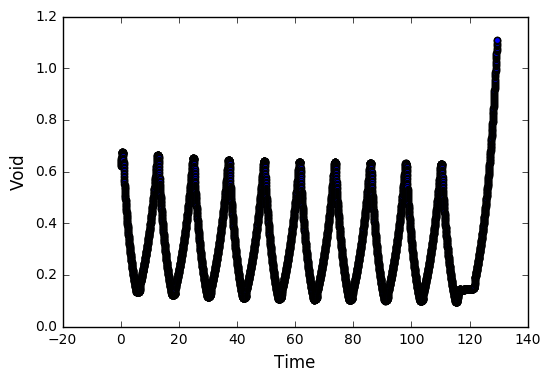

GetSourceFiles
file entered: 2
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.2924
6476 6476 6476
SaveInNEWDictionary


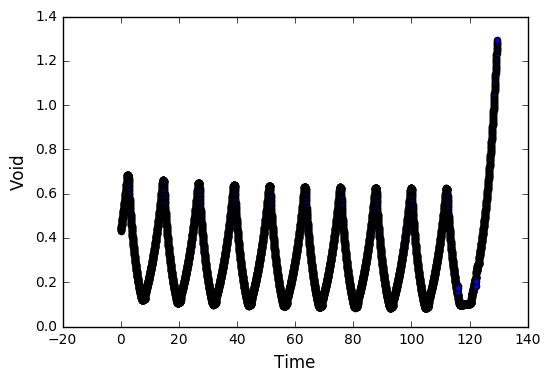

GetSourceFiles
file entered: 3
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.1442
6476 6476 6476
SaveInNEWDictionary


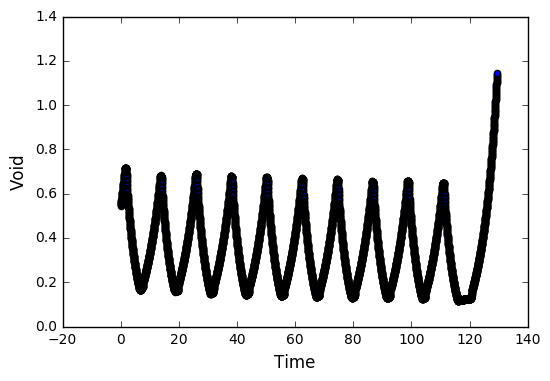

GetSourceFiles
file entered: 4
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.1511
6476 6476 6476
SaveInNEWDictionary


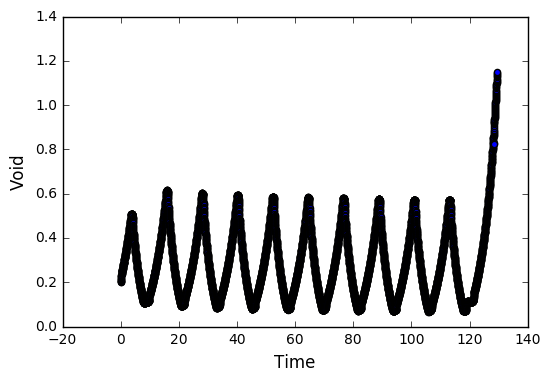

GetSourceFiles
file entered: 5
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.266
6476 6476 6476
SaveInNEWDictionary


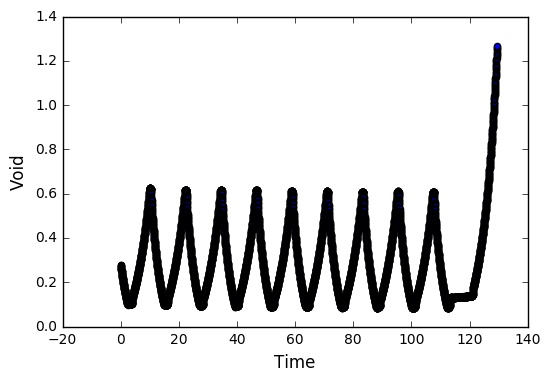

GetSourceFiles
file entered: 6
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.0359
6476 6476 6476
SaveInNEWDictionary


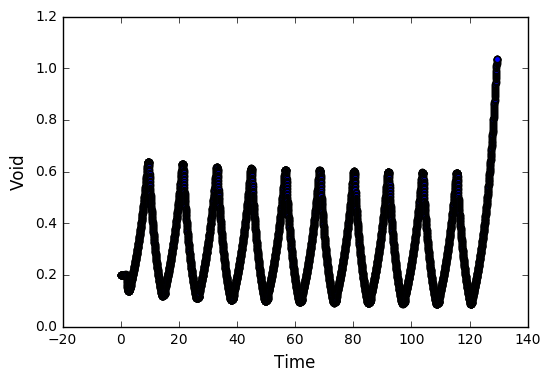

GetSourceFiles
file entered: 7
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.1541
6476 6476 6476
SaveInNEWDictionary


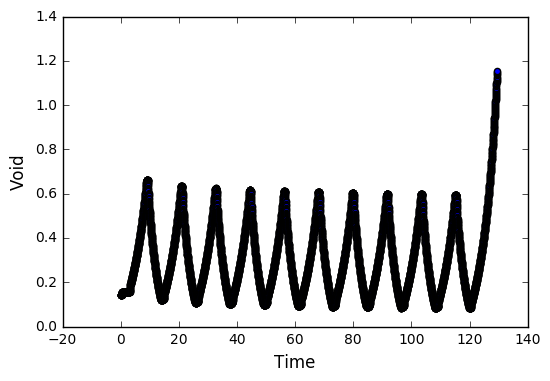

GetSourceFiles
file entered: 8
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.2117
6476 6476 6476
SaveInNEWDictionary


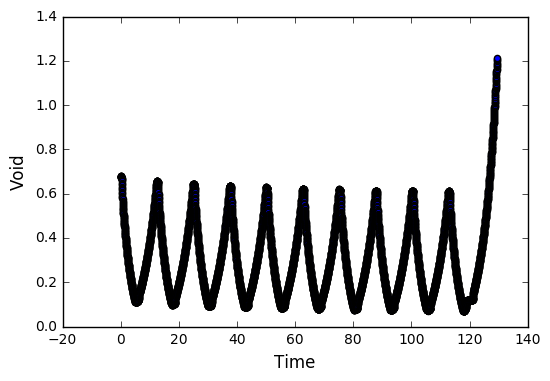

GetSourceFiles
file entered: 9
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.3212
6476 6476 6476
SaveInNEWDictionary


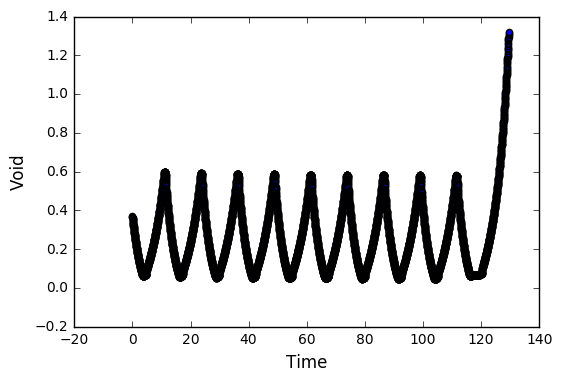

GetSourceFiles
file entered: 10
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.3461
6476 6476 6476
SaveInNEWDictionary


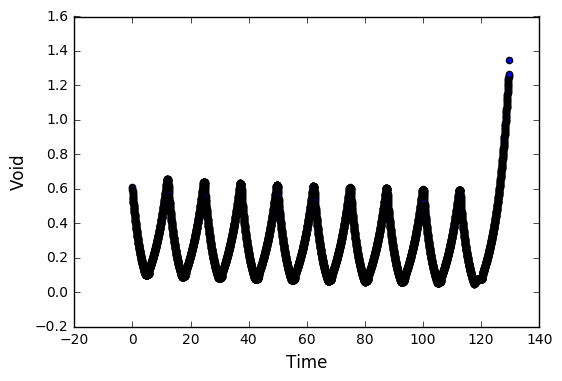

GetSourceFiles
file entered: 11
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.2396
6476 6476 6476
SaveInNEWDictionary


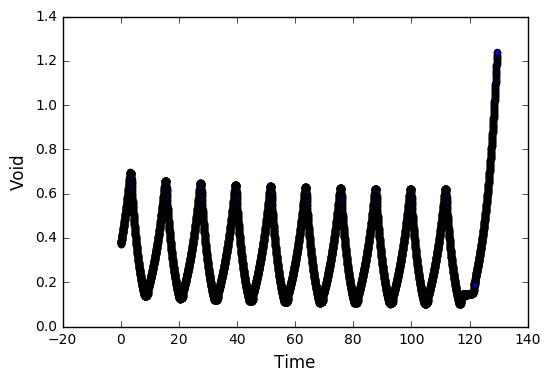

GetSourceFiles
file entered: 12
SaveInDictionary
desired_nr_datapoints= 6475
MaxPressure= 1.2657
6476 6476 6476
SaveInNEWDictionary


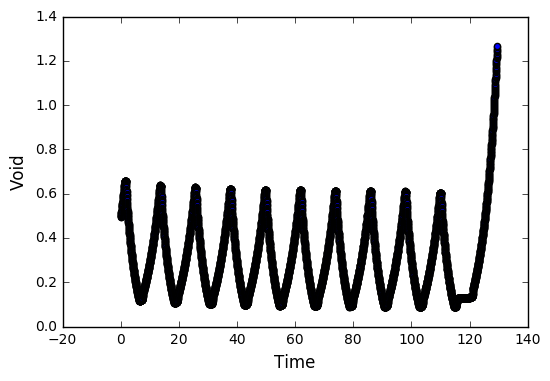

averageMAXP= 1.21155
AVERAGE GRAPH OF ALL 13 PRESSURES FOR 8s


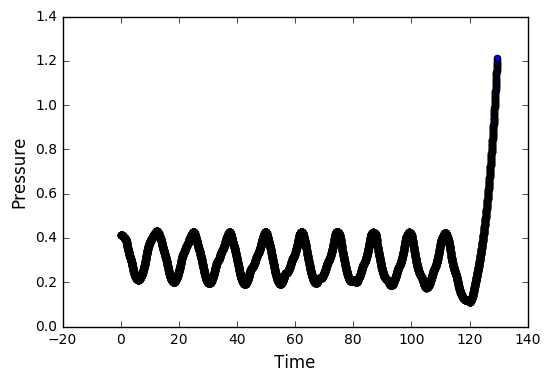

In [11]:
#MAIN!!
P = list()
while (i <= number_of_files and i!=max_iter):
    pressure,void = GetSourceFiles(list_of_source_files,i) #return pressure and time from specific file
    pressures,voids = SaveInDictionary (pressure,void,i)
    p,v,t,maxP = FilterDataRoundOne(pressures[i],voids[i],i)
    finalpressures,finalvoids,times,maxPs = SaveInNewList(p,v,t,maxP,i)
    CreateGraphs(finalpressures,finalvoids,times,i)
    i+=1 #increment i to loop

#Take the average maximum pressures of all the samples and average it
averageMAXP = AverageMaxPressure(maxPs)  
print('averageMAXP=',averageMAXP)

#Make a new list containing the average pressure-,void- and time- values
Paverage, Vagerage, Taverage = AveragePressure(finalpressures,finalvoids)

#Make a final graph of the average pressure,void and time
print("AVERAGE GRAPH OF ALL 13 PRESSURES FOR 8s")
fig, ax = plt.subplots()# generate figure with axes
ax.scatter(Taverage, Paverage) #create a scatter plot
axis_font = {'size':'12'} #customize graph
plt.ylabel("Pressure",**axis_font),plt.xlabel("Time",**axis_font) #name axes
plt.show() #show graph
fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))
